#### Import the libraries

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import cifar10

#### Load the data

In [29]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [30]:
x_train.shape

(50000, 32, 32, 3)

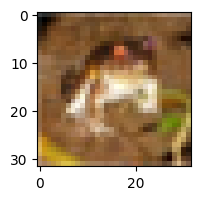

In [31]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

In [32]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog',
          'horse','ship','truck']

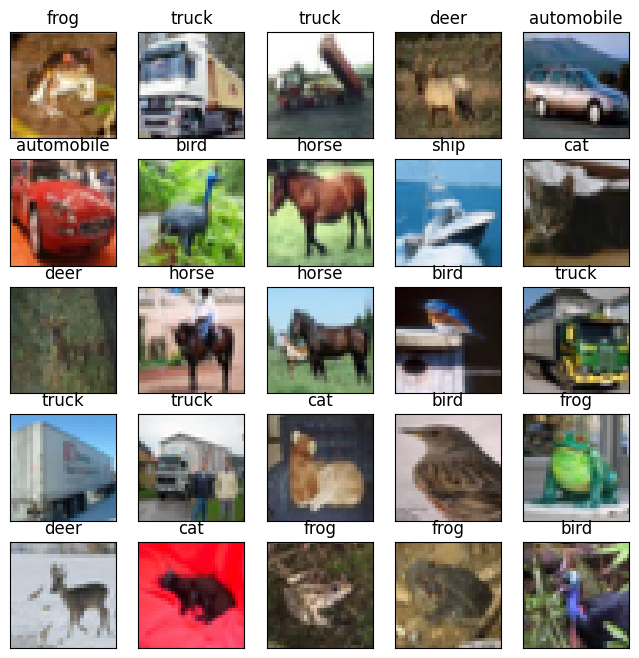

In [33]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]);  plt.yticks([]);
    plt.title(labels[y_train[i][0]])
    plt.imshow(x_train[i])

#### Build the model

In [34]:
model = Sequential()

model.add(Input((32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#### Compile the model

In [35]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#### Train the model

In [36]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.1166 - loss: 2.8543
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.1585 - loss: 2.2042
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.4054 - loss: 1.6391
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.4847 - loss: 1.4526
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.5327 - loss: 1.3286
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.5627 - loss: 1.2515
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.5862 - loss: 1.1906
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.6030 - loss: 1.1392
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.6184 - loss: 1.0802
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.6325 - loss: 1.0456


In [37]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.5334 - loss: 1.3863


[1.404242992401123, 0.5339000225067139]

In [40]:
import cv2

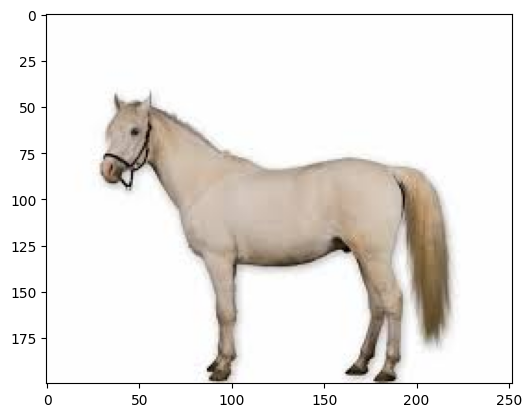

In [39]:
newimg = plt.imread('image.jpeg')
plt.imshow(newimg)

In [45]:
newimg = plt.imread('image.jpeg')
newimg = cv2.resize(newimg, (32, 32))
newimg = newimg.reshape(1,32,32,3)
result = model.predict(newimg)
labels[result.argmax()]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


'horse'